<a href="https://colab.research.google.com/github/cristovsss/deteksiwajah/blob/main/Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop Machine Learning - hands on classification

# My Own Teachable Machine Learning



*   Inspired by : https://teachablemachine.withgoogle.com/ ; Create our own Classification Model using our own dataset
* Google Colab
* Videos as dataset, $n$ videos for $n$ target object  



# Import the Required Moduls


## Machine Learning

* A field of study that gives computers the ability **to learn without being explicitly programmed**.
* The science of programming computers so they can **learn from data**


**Type of supervision:**


*   Supervised Learning
*   Unsupervised Learning


**Multilayers Perceptron**

![picture](https://drive.google.com/uc?export=view&id=1TfC0C6aWWZhsfdAS4f9N54ep3ove2Uro)

**Deep Learning - Convolutional Neural Networks**

![picture](https://drive.google.com/uc?export=view&id=1IsqX42fi-LuTzhRgxEIxly0HNK8pnu43)

**Feature Engineering vs Feature Learning**

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import keras,os
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from keras import utils
from keras.models import load_model
from keras.applications.vgg16 import VGG16, preprocess_input

import numpy as np

In [13]:
pip install visualkeras

In [14]:
import visualkeras

## Images

In [15]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Dataset

## Create Frames/Images from Video

In [16]:
numOfClasses=3
category=['Ball','Bottle','Mouse']
imgSizes=(220,200) #width x height

In [17]:
def createFrames(path,classes):
  for id in range(len(classes)):
    pathData = path+classes[id]
    videoPath=path+classes[id]+'.mp4'
    os.mkdir(pathData)
    cap = cv2.VideoCapture(videoPath)
    success,frame = cap.read()
    count = 0
    success = True
    while success:
      imgName=pathData+"/frame%d.jpg"%count
      cv2.imwrite(imgName, frame)     # save frame as JPEG file
      count += 1
      success,frame = cap.read()

## Create Dataset

In [18]:
def createDataset(path,classses,imSizes):
  data=[]
  target=[]
  for id in range(len(classses)):
    pathData = path+classses[id]
    dir_list = os.listdir(pathData)
    print("Files and directories in '", pathData, "' :")
    for imgFileName in dir_list:
      filename=pathData+'/'+imgFileName
      image=cv2.imread(filename)
      image = cv2.resize(image, imSizes, interpolation = cv2.INTER_LINEAR)
      data.append(image)
      target.append(id)
  return data,target

In [19]:
path="/content/drive/MyDrive/UTS Datamining/"
createFrames(path,category)
trainData,trainTarget=createDataset(path,category,imgSizes)

Files and directories in ' /content/drive/MyDrive/UTS Datamining/Ball ' :
Files and directories in ' /content/drive/MyDrive/UTS Datamining/Bottle ' :
Files and directories in ' /content/drive/MyDrive/UTS Datamining/Mouse ' :


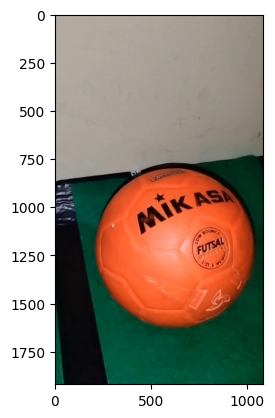

In [20]:
a=plt.imread("/content/drive/MyDrive/UTS Datamining/Ball/frame11.jpg")
plt.imshow(a)

In [21]:
trainData=np.array(trainData)
trainTarget=np.array(trainTarget)
np.save(path+"trainData.npy",trainData)
np.save(path+"trainTarget.npy",trainTarget)

In [22]:
trainData=np.load(path+"trainData.npy")
trainTarget=np.load(path+"trainTarget.npy")

In [23]:
print(trainData.shape)
print(trainTarget.shape)

(452, 200, 220, 3)
(452,)


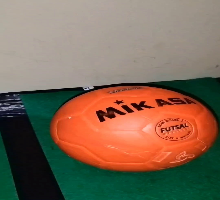

In [24]:
cv2_imshow(trainData[0])

In [25]:
trainTarget[0]

0

# Classification


* Binary Classification
* Multi Class Classification
* Multi Label Classification

**Binary Classification**

Positive/Negative

![picture](https://drive.google.com/uc?export=view&id=1Kv1zwhx2HeOa8IbIDKoogRdLhxIYappf)



**Multi Class**

one of $n$ classes

![picture](https://drive.google.com/uc?export=view&id=1AO_CeNDi_IOTFGxpdjc0EkVUYtkbIkoc)

**Multi Label**

$m$ of $n$ classes, where $m=(1,2,3,..n)$

![picture](https://drive.google.com/uc?export=view&id=11j2y1zAcQXAtprunR3BzN9TE-__aGvnx)



Notes

https://youtu.be/-_lcyVGSCXs?si=9tDqI535izBtOBEE

https://youtu.be/qMYf1PB1puc?si=gsAxrM78Ogyi2UJH



## VGG16-from the scratch


* Visual Geometry Group - 16 layers of trainable parameters
* Trained on 1.2 million images
* 1000 categories
* https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/


![picture](https://drive.google.com/uc?export=view&id=1sfv1xLscKvcMlRkiNzvjiFyCA4tFX95j)





### Create Architecture

In [26]:
model = Sequential()
#ConvolutionLayers
model.add(Conv2D(input_shape=(imgSizes[1],imgSizes[0],3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#DenseLayers
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=numOfClasses, activation="softmax"))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 220, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 110, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 110, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 110, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 55, 128)       0         
 g2D)                                                   

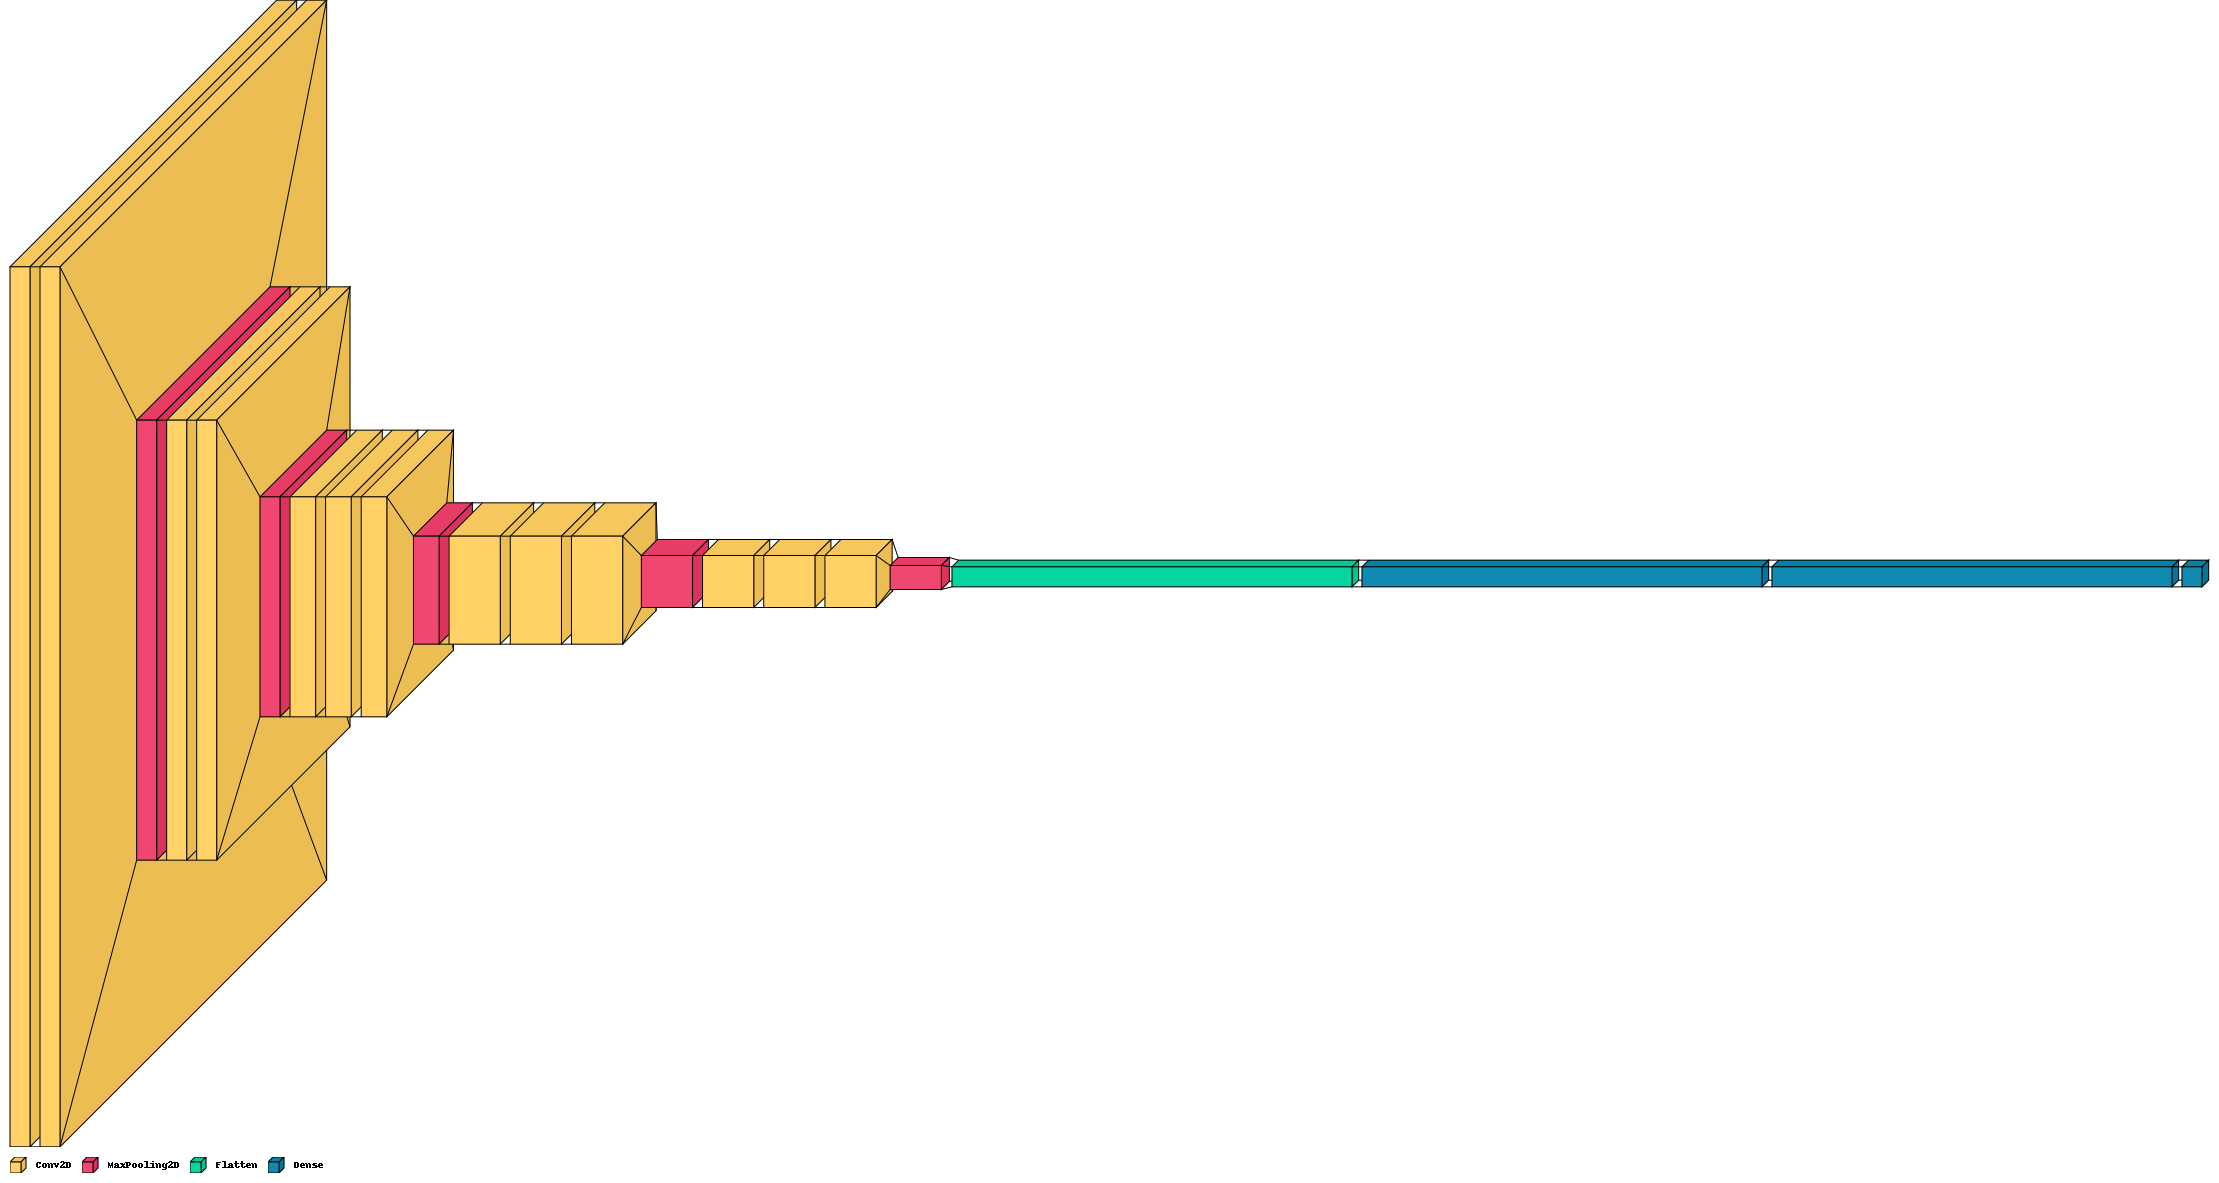

In [28]:
visualkeras.layered_view(model, legend=True)

### Train the Model

In [29]:
trainTargetBin=utils.to_categorical(trainTarget)

In [30]:
print(trainTargetBin.shape)
print(trainTargetBin[-1])

(452, 3)
[0. 0. 1.]


In [31]:
trainData=np.load(path+'trainData.npy')
trainTarget=np.load(path+'trainTarget.npy')

In [32]:
trainTargetBin=utils.to_categorical(trainTarget)
n_epochs=5
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
histModel=model.fit(trainData,trainTargetBin, batch_size=50,epochs=n_epochs,verbose=1)

Epoch 1/5
10/10 [==============================] - 945s 90s/step - loss: 2225816.0000 - accuracy: 0.3296
Epoch 2/5
10/10 [==============================] - 902s 89s/step - loss: 3.8781 - accuracy: 0.3673
Epoch 3/5
10/10 [==============================] - 900s 89s/step - loss: 0.9588 - accuracy: 0.4049
Epoch 4/5
10/10 [==============================] - 971s 97s/step - loss: 12.0212 - accuracy: 0.4314
Epoch 5/5
10/10 [==============================] - 971s 96s/step - loss: 1.1054 - accuracy: 0.3695


In [33]:
model.save(path+'scratchVGG.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
def plottingHistory(hist,typePlot):
  plt.plot(hist.history[typePlot])
  plt.title('My Model - %s'%typePlot)
  plt.ylabel(typePlot)
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
  plt.show()

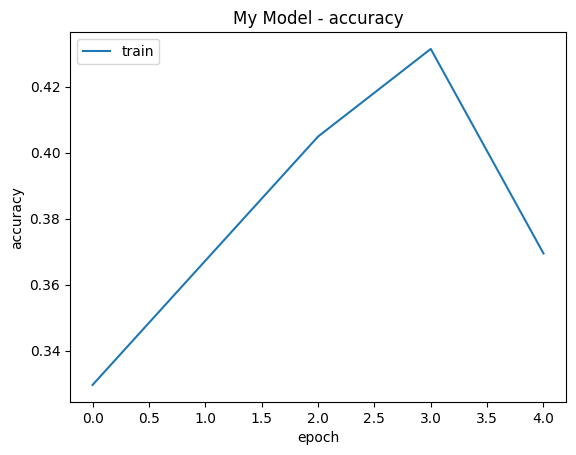

In [35]:
plottingHistory(histModel,'accuracy')

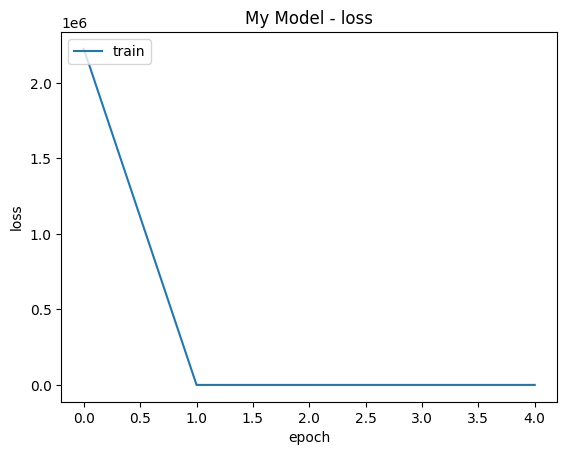

In [36]:
plottingHistory(histModel,'loss')

### Test the Model

In [37]:
model=load_model(path+'scratchVGG.h5')

In [38]:
test=cv2.imread("/content/drive/MyDrive/UTS Datamining/Bottle/frame13.jpg")
test = cv2.resize(test, imgSizes, interpolation = cv2.INTER_LINEAR)
#cv2_imshow(test)
test=np.array([test])
prob=model.predict(test)
print(category[np.argmax(prob)])

1/1 [==============================] - 1s 884ms/step
Bottle


In [39]:
print(prob)
print(np.sum(prob))

[[0.30805543 0.35239896 0.33954552]]
0.9999999


In [40]:
#allDataTrain
prob=model.predict(trainData)
categoryOutput=np.argmax(prob,axis=1)
print(categoryOutput.shape)

15/15 [==============================] - 265s 18s/step
(452,)


In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(trainTarget, categoryOutput)

array([[  0, 151,   0],
       [  0, 150,   0],
       [  0,  55,  96]])

## Trained VGG-16

### Create Architecture

In [42]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    # Include_top = False to exclude the FCN.
    conv_base = VGG16(include_top=False, weights='imagenet',input_shape=input_shape)

    # fine_tune=0 to freeze the convolutional layers
    # otherwise trained the last n convolutional layers
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    #create the FCN based on our dataset
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [43]:
vgg_model = create_model((imgSizes[1],imgSizes[0],3),numOfClasses,fine_tune=0)

58889256/58889256 [==============================] - 0s 0us/step


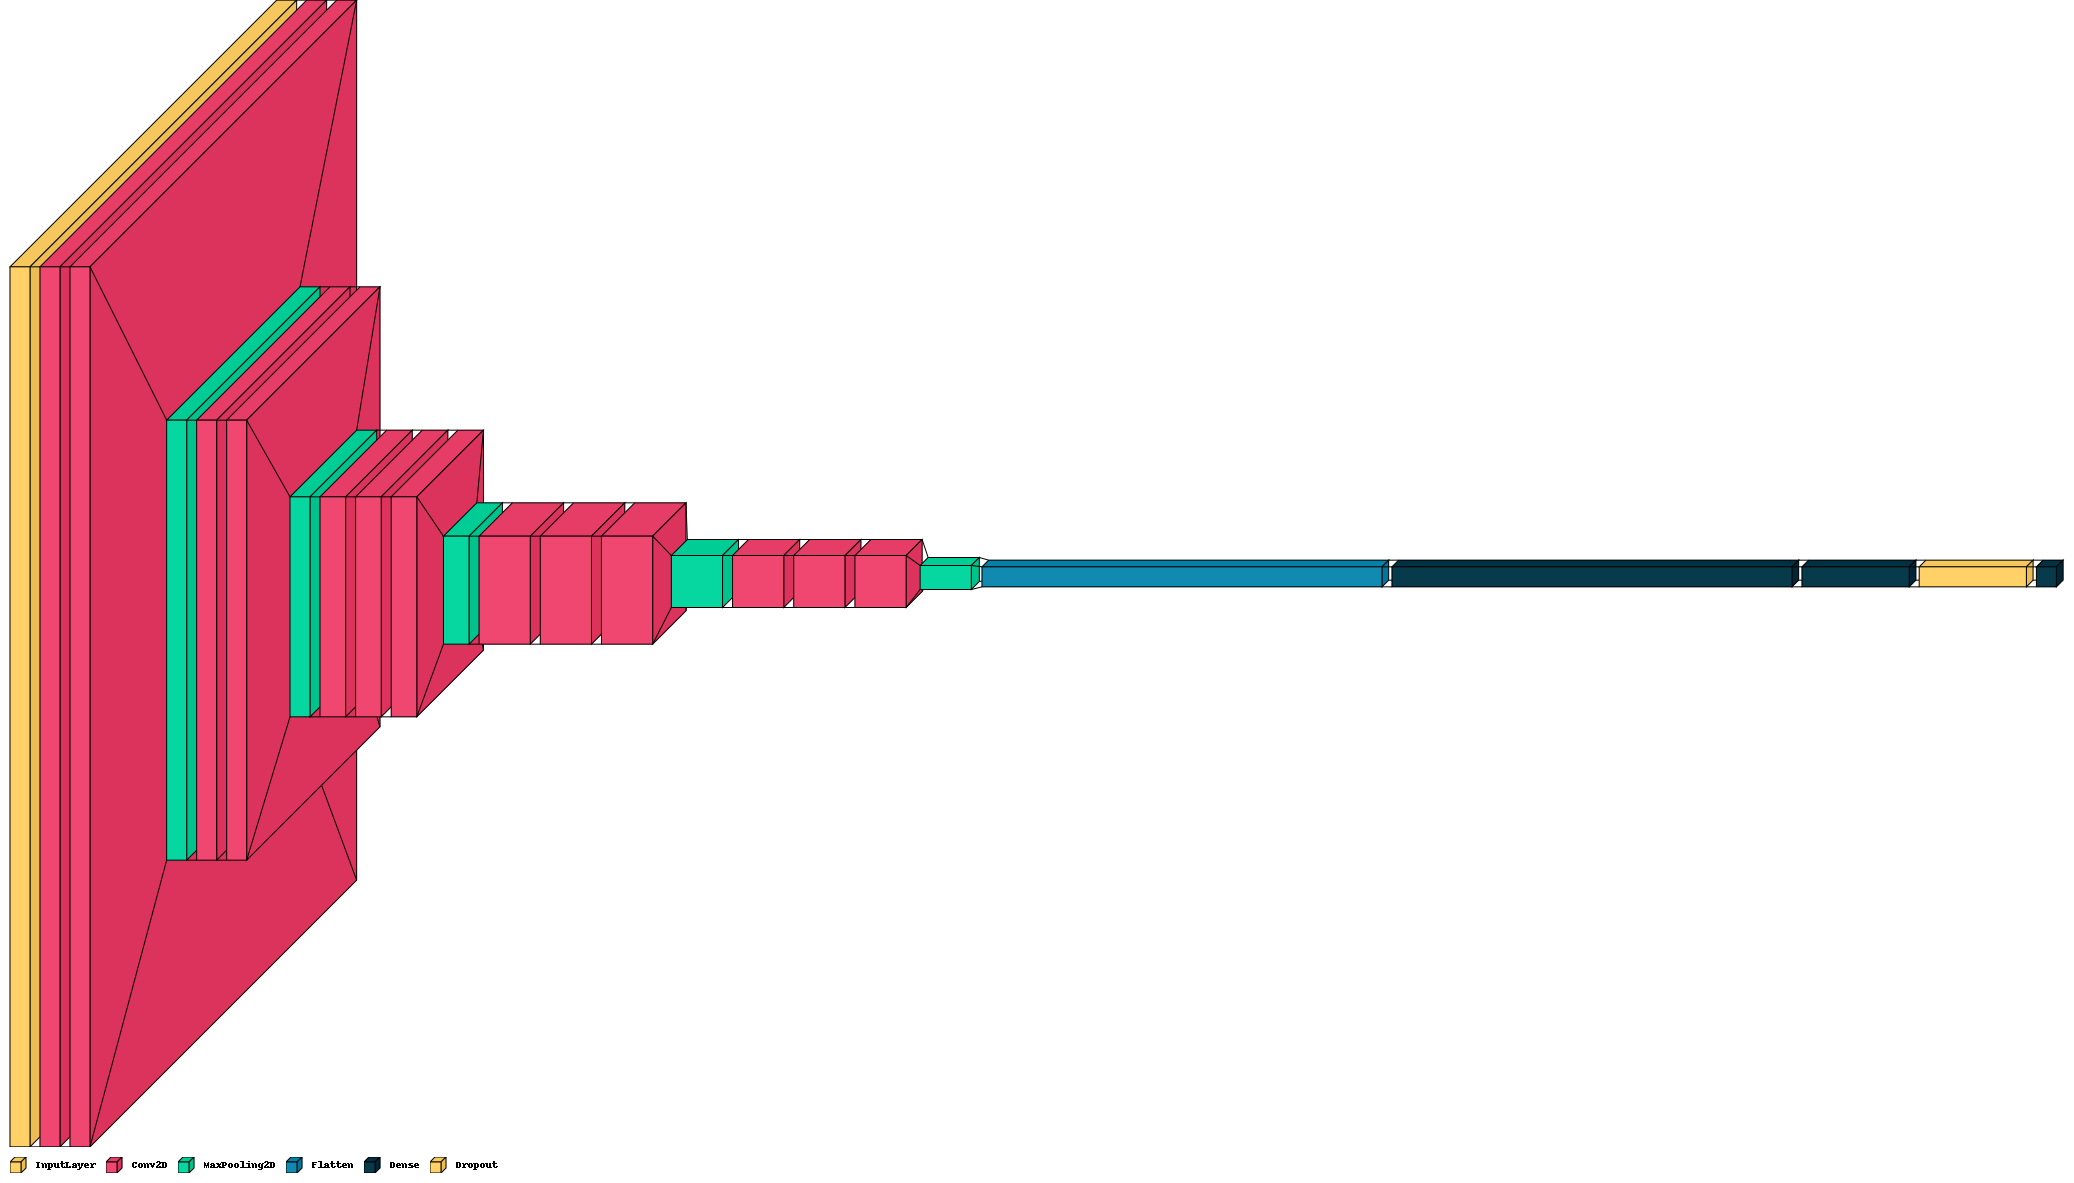

In [44]:
visualkeras.layered_view(vgg_model, legend=True)

### Train the Model

In [45]:
vgg_history = vgg_model.fit(trainData,trainTargetBin, batch_size=50,epochs=n_epochs,verbose=1)

Epoch 1/5
10/10 [==============================] - 297s 29s/step - loss: 123.1239 - accuracy: 0.8518
Epoch 2/5
10/10 [==============================] - 284s 28s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/5
10/10 [==============================] - 281s 27s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/5
10/10 [==============================] - 292s 28s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
10/10 [==============================] - 285s 28s/step - loss: 0.0000e+00 - accuracy: 1.0000


In [46]:
vgg_model.save(path+'trainedVGG.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


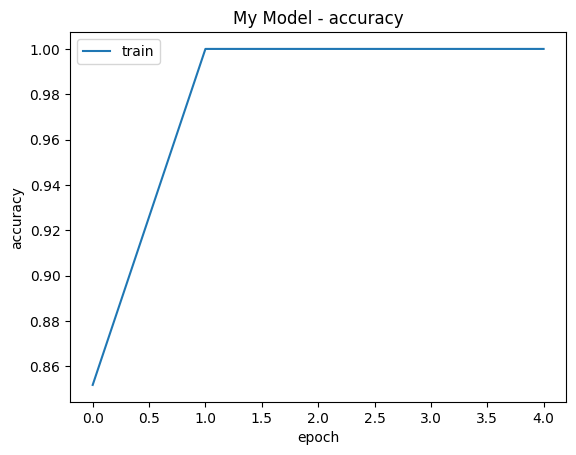

In [47]:
plottingHistory(vgg_history,'accuracy')

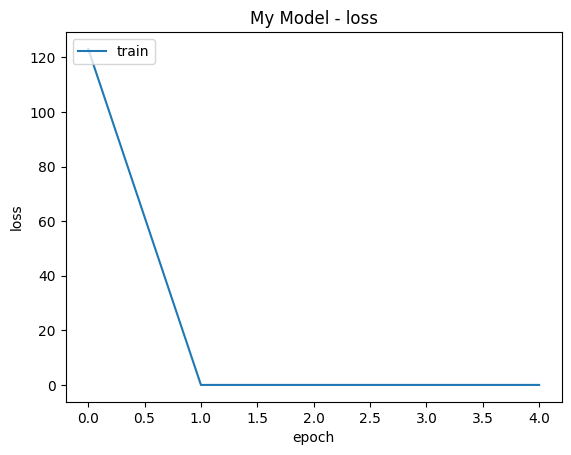

In [48]:
plottingHistory(vgg_history,'loss')

### Test the Model

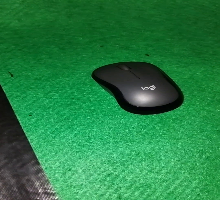

1/1 [==============================] - 1s 721ms/step
Mouse


In [49]:
test=cv2.imread("/content/drive/MyDrive/UTS Datamining/Mouse/frame11.jpg")
test = cv2.resize(test, imgSizes, interpolation = cv2.INTER_LINEAR)
cv2_imshow(test)
test=np.array([test])
prob=vgg_model.predict(test)
print(category[np.argmax(prob)])

In [50]:
#allDataTrain
prob=vgg_model.predict(trainData)
categoryOutput=np.argmax(prob,axis=1)
print(categoryOutput.shape)
confusion_matrix(trainTarget, categoryOutput)

15/15 [==============================] - 281s 18s/step
(452,)


array([[151,   0,   0],
       [  0, 150,   0],
       [  0,   0, 151]])